In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import pickle
tf.random.set_seed(100)
np.random.seed(100)

In [ ]:
train=pd.read_csv('/content/drive/My Drive/MEMS Google Colabs/csv_data/train.csv')
val=pd.read_csv('/content/drive/My Drive/MEMS Google Colabs/csv_data/val.csv')
train.head()

,Unnamed: 0,Start_time,End_Time,Wheezing,Patient_ID,Mode,File_Name,Audio_Name
0,5336,2.1450,7.788,0,200,mc,200_2p3_Al_mc_AKGC417L,200_2p3_Al_mc_AKGC417L_0.wav
1,3058,11.1600,15.401,1,160,mc,160_1b4_Al_mc_AKGC417L,160_1b4_Al_mc_AKGC417L_2.wav
2,1945,10.6500,13.321,0,135,mc,135_2b1_Al_mc_LittC2SE,135_2b1_Al_mc_LittC2SE_5.wav
3,1475,6.9447,7.997,1,124,sc,124_1b1_Ar_sc_Litt3200,124_1b1_Ar_sc_Litt3200_5.wav
4,2938,14.5660,16.101,0,154,mc,154_1b3_Al_mc_AKGC417L,154_1b3_Al_mc_AKGC417L_8.wav


In [ ]:
ytrain=train.Wheezing
yval=val.Wheezing
yval

0       0
1       0
2       0
3       0
4       0
       ..
1720    0
1721    0
1722    0
1723    0
1724    0
Name: Wheezing, Length: 1725, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [ ]:
pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/mfcc_train.pkl', 'rb')
mfcc_train = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
mfcc_train[0]

array([[-466.1796, -466.1796, -466.1796, ..., -466.1796, -466.1796,
        -466.1796],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [ ]:
pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/mfcc_train.pkl', 'rb')
mfcc_train = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/cstft_train.pkl', 'rb')
cstft_train = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/mSpec_train.pkl', 'rb')
mSpec_train = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/mfcc_val.pkl', 'rb')
mfcc_val = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/cstft_val.pkl', 'rb')
cstft_val = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/drive/My Drive/MEMS Google Colabs/saved_pickles/mSpec_val.pkl', 'rb')
mSpec_val = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
layer_mfcc = {}
layer_mfcc[0]=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
layer_mfcc[1]=keras.layers.BatchNormalization()(layer_mfcc[0])
layer_mfcc[2]=keras.layers.Activation(keras.activations.relu)(layer_mfcc[1])
layer_mfcc[3]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mfcc[2])

layer_mfcc[4]=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(layer_mfcc[3])
layer_mfcc[5]=keras.layers.BatchNormalization()(layer_mfcc[4])
layer_mfcc[6]=keras.layers.Activation(keras.activations.relu)(layer_mfcc[5])
layer_mfcc[7]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mfcc[6])

layer_mfcc[8]=keras.layers.Conv2D(96,2,padding='same')(layer_mfcc[7])
layer_mfcc[9]=keras.layers.BatchNormalization()(layer_mfcc[8])
layer_mfcc[10]=keras.layers.Activation(keras.activations.relu)(layer_mfcc[9])
layer_mfcc[11]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mfcc[10])

layer_mfcc[12]=keras.layers.Conv2D(128,2,padding='same')(layer_mfcc[11])
layer_mfcc[13]=keras.layers.BatchNormalization()(layer_mfcc[12])
layer_mfcc[14]=keras.layers.Activation(keras.activations.relu)(layer_mfcc[13])
mfcc_output=keras.layers.GlobalMaxPooling2D()(layer_mfcc[14])

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mfccInput (InputLayer)       [(None, 20, 259, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 87, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 87, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 20, 87, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 22, 64)        25

In [ ]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
layer_chroma = {}
layer_chroma[0]=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
layer_chroma[1]=keras.layers.BatchNormalization()(layer_chroma[0])
layer_chroma[2]=keras.layers.Activation(keras.activations.relu)(layer_chroma[1])
layer_chroma[3]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_chroma[2])

layer_chroma[4]=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(layer_chroma[3])
layer_chroma[5]=keras.layers.BatchNormalization()(layer_chroma[4])
layer_chroma[6]=keras.layers.Activation(keras.activations.relu)(layer_chroma[5])
layer_chroma[7]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_chroma[6])

layer_chroma[8]=keras.layers.Conv2D(128,2,padding='same')(layer_chroma[7])
layer_chroma[9]=keras.layers.BatchNormalization()(layer_chroma[8])
layer_chroma[10]=keras.layers.Activation(keras.activations.relu)(layer_chroma[9])
croma_output=keras.layers.GlobalMaxPooling2D()(layer_chroma[10])

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cromaInput (InputLayer)      [(None, 12, 259, 1)]      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 87, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 87, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 12, 87, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 43, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 22, 64)         18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 22, 64)         2

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")

layer_mSpec = {}

layer_mSpec[0]=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
layer_mSpec[1]=keras.layers.BatchNormalization()(layer_mSpec[0])
layer_mSpec[2]=keras.layers.Activation(keras.activations.relu)(layer_mSpec[1])
layer_mSpec[3]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mSpec[2])

layer_mSpec[4]=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(layer_mSpec[3])
layer_mSpec[5]=keras.layers.BatchNormalization()(layer_mSpec[4])
layer_mSpec[6]=keras.layers.Activation(keras.activations.relu)(layer_mSpec[5])
layer_mSpec[7]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mSpec[6])

layer_mSpec[8]=keras.layers.Conv2D(96,2,padding='same')(layer_mSpec[7])
layer_mSpec[9]=keras.layers.BatchNormalization()(layer_mSpec[8])
layer_mSpec[10]=keras.layers.Activation(keras.activations.relu)(layer_mSpec[9])
layer_mSpec[11]=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(layer_mSpec[10])

layer_mSpec[12]=keras.layers.Conv2D(128,2,padding='same')(layer_mSpec[11])
layer_mSpec[13]=keras.layers.BatchNormalization()(layer_mSpec[12])
layer_mSpec[14]=keras.layers.Activation(keras.activations.relu)(layer_mSpec[13])
mSpec_output=keras.layers.GlobalMaxPooling2D()(layer_mSpec[14])

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mSpecInput (InputLayer)      [(None, 128, 259, 1)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 87, 32)        832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 87, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 87, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 22, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 22, 64)        2

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)

hidden = {}
concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden[0]=keras.layers.Dense(50,activation='relu')(concat)
hidden[1]=keras.layers.Dropout(0.6)(hidden[0])
hidden[2]=keras.layers.Dense(25,activation='relu')(hidden[1])
hidden[3]=keras.layers.Dropout(0.6)(hidden[2])
output=keras.layers.Dense(2,activation='sigmoid')(hidden[3])

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mfcc (InputLayer)               [(None, 20, 259, 1)] 0                                            
__________________________________________________________________________________________________
croma (InputLayer)              [(None, 12, 259, 1)] 0                                            
__________________________________________________________________________________________________
mspec (InputLayer)              [(None, 128, 259, 1) 0                                            
__________________________________________________________________________________________________
mfccModel (Functional)          (None, 128)          94560       mfcc[0][0]                       
________________________________________________________________________________________________

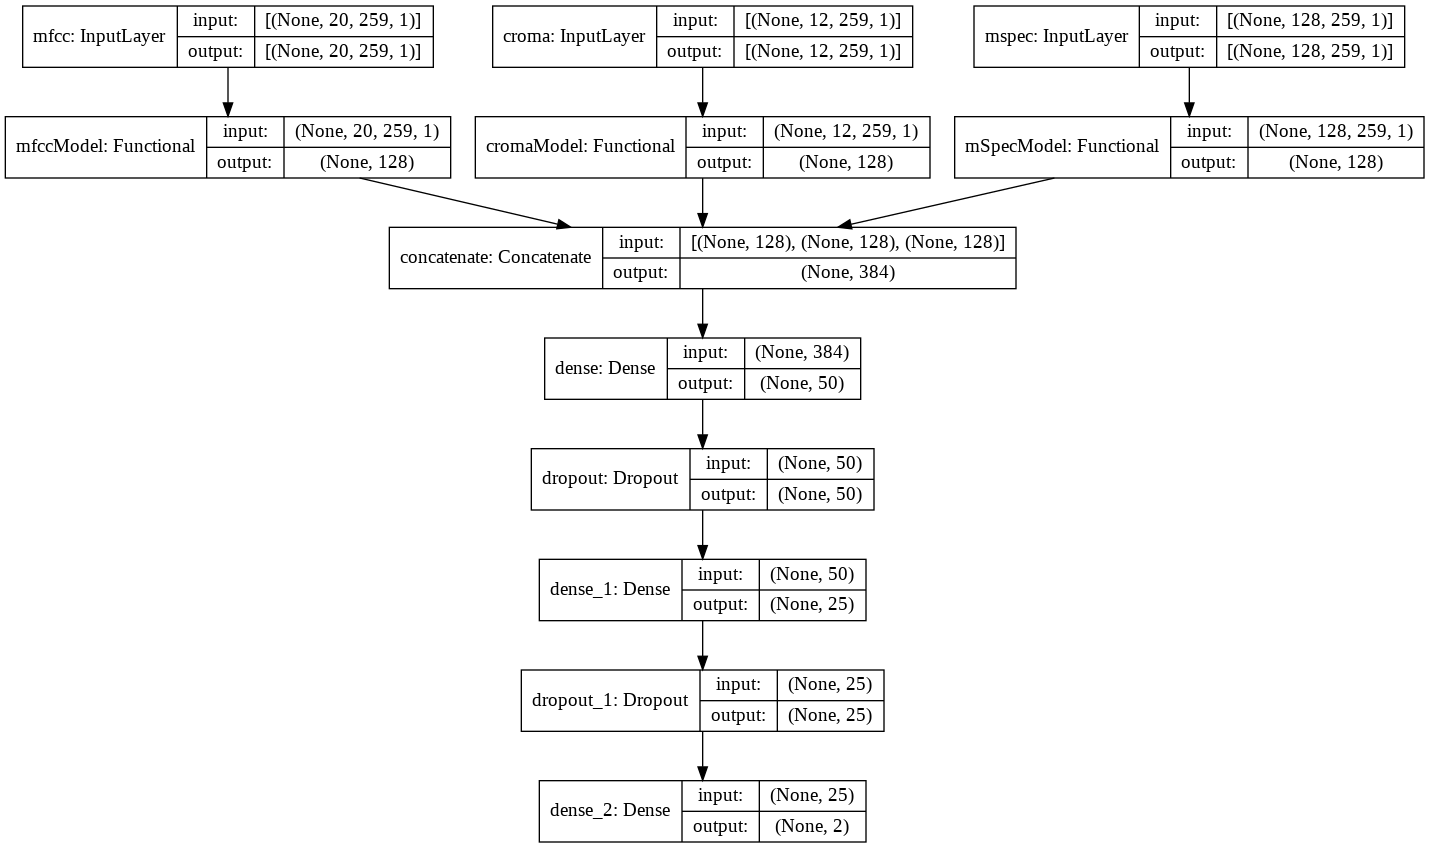

In [ ]:
keras.utils.plot_model(net, "net.png", show_shapes=True)

In [ ]:
from tensorflow.keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.0001)

In [ ]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100
)

Epoch 1/100
162/162 [==============================] - 38s 24ms/step - loss: 1.0736 - accuracy: 0.6814 - val_loss: 0.7264 - val_accuracy: 0.5588
Epoch 2/100
162/162 [==============================] - 3s 19ms/step - loss: 0.6106 - accuracy: 0.7499 - val_loss: 0.5791 - val_accuracy: 0.7820
Epoch 3/100
162/162 [==============================] - 3s 20ms/step - loss: 0.5788 - accuracy: 0.7692 - val_loss: 0.5210 - val_accuracy: 0.7983
Epoch 4/100
162/162 [==============================] - 3s 20ms/step - loss: 0.5647 - accuracy: 0.7777 - val_loss: 0.5122 - val_accuracy: 0.7983
Epoch 5/100
162/162 [==============================] - 3s 20ms/step - loss: 0.5284 - accuracy: 0.7877 - val_loss: 0.4885 - val_accuracy: 0.7994
Epoch 6/100
162/162 [==============================] - 3s 20ms/step - loss: 0.5192 - accuracy: 0.7866 - val_loss: 0.4931 - val_accuracy: 0.7994
Epoch 7/100
162/162 [==============================] - 3s 19ms/step - loss: 0.5091 - accuracy: 0.7922 - val_loss: 0.4994 - val_accuracy

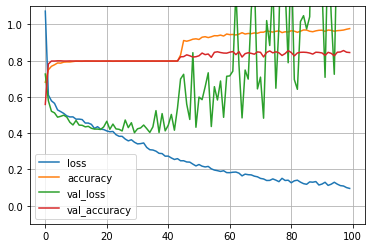

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 0s 7ms/step - loss: 1.5190 - accuracy: 0.8452


[1.5189712047576904, 0.8452174067497253]

In [ ]:
c=np.argmax(net.predict({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val}),axis=1)

In [ ]:
count_copy=0
count_org=0
for item in c:
  if item==1:
    count_copy += 1
for item in yval:
  if item==1:
    count_org += 1
print(count_org,count_copy)



348 167


# Checkpoint


In [ ]:
# import json

# json_dict = {}
# json_dump=[]
# i = 0

# class NumpyEncoder(json.JSONEncoder):
#     def default(self, obj):
#         if isinstance(obj, np.ndarray):
#             return obj.tolist()
#         return json.JSONEncoder.default(self, obj)
 
# for layer in net.layers:
#   json_dict[str(layer.get_config())]= layer.get_weights()
#   json_dump=json.dumps(json_dict, cls=NumpyEncoder)


#   with open("/content/drive/My Drive/MEMS Google Colabs/jsons/weight_json_layer_"+str(i)+".json", "w") as fp:
#     json.dump(json_dump,fp) 

#   json_dict.clear()
#   i += 1






# Keras2c

In [ ]:
net.save("/content/drive/My Drive/MEMS Google Colabs/jsons/net_model_updated")

INFO:tensorflow:Assets written to: /content/drive/My Drive/MEMS Google Colabs/jsons/net_model_updated/assets


In [ ]:
# !git clone https://github.com/f0uriest/keras2c.git


In [ ]:
# from keras2c import k2c
# k2c(net, function_name, malloc=False, num_tests=10, verbose=True)